In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
df = pd.read_csv(r"C:\Users\Gauri\OneDrive\Desktop\ml2\Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
income_col = "Annual Income (k$)"
spend_col = "Spending Score (1-100)"

print("Income Column:", income_col)
print("Spending Column:", spend_col)


Income Column: Annual Income (k$)
Spending Column: Spending Score (1-100)


In [25]:
income_thresh = df[income_col].median()
spend_thresh = df[spend_col].median()

income_thresh, spend_thresh


(61.5, 50.0)

In [26]:
def segment_customer(row):
    if row[income_col] >= income_thresh and row[spend_col] >= spend_thresh:
        return "Premium Customer"
    elif row[income_col] >= income_thresh and row[spend_col] < spend_thresh:
        return "Saver"
    elif row[income_col] < income_thresh and row[spend_col] >= spend_thresh:
        return "Impulsive Buyer"
    else:
        return "Budget Customer"

df["Segment"] = df.apply(segment_customer, axis=1)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Segment
0,1,Male,19,15,39,Budget Customer
1,2,Male,21,15,81,Impulsive Buyer
2,3,Female,20,16,6,Budget Customer
3,4,Female,23,16,77,Impulsive Buyer
4,5,Female,31,17,40,Budget Customer


In [27]:
df["Segment"].value_counts()


Segment
Impulsive Buyer     52
Saver               50
Premium Customer    50
Budget Customer     48
Name: count, dtype: int64

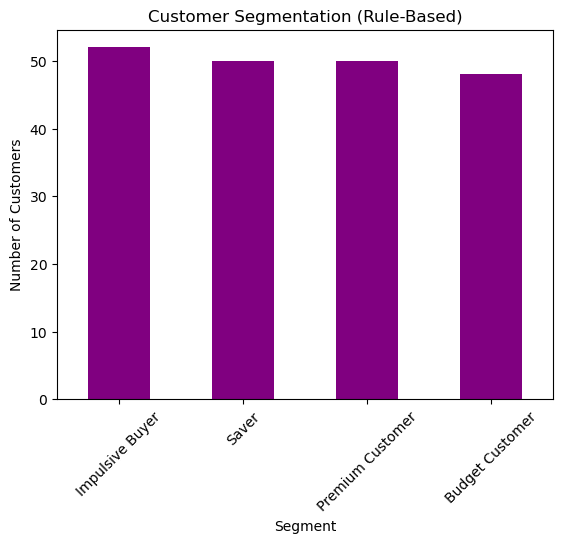

In [28]:
df["Segment"].value_counts().plot(kind="bar", color="purple")

plt.title("Customer Segmentation (Rule-Based)")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


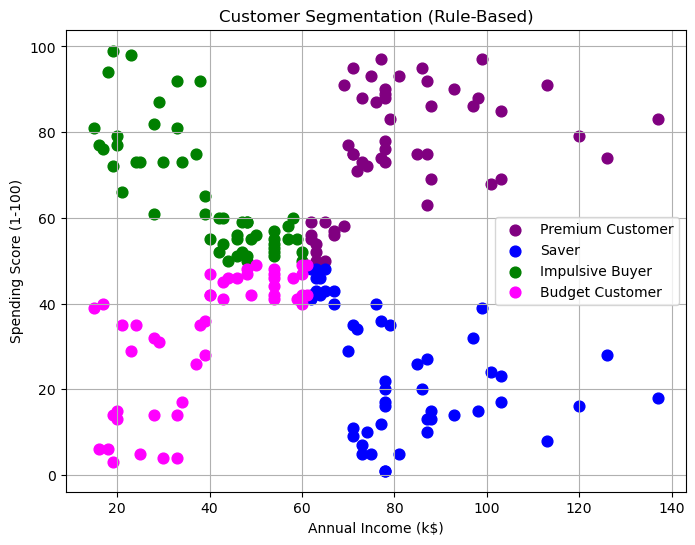

In [29]:
plt.figure(figsize=(8,6))

segment_colors = {
    "Premium Customer": "purple",
    "Saver": "blue",
    "Impulsive Buyer": "green",
    "Budget Customer": "magenta"
}

for segment, color in segment_colors.items():
    temp = df[df["Segment"] == segment]
    plt.scatter(temp[income_col], temp[spend_col], c=color, label=segment, s=60)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation (Rule-Based)")
plt.legend()
plt.grid(True)
plt.show()
